In [7]:
#two operations have to be done


#1) interpolation

# IGOR interp2d definition
# The Interp2D function returns a double precision 
# number as the bilinear interpolation value at the
#  specified coordinates of the source wave.
#  It returns NaN if the point is outside 
# the source wave domain or if the source wave is complex.
# 
# from this we should update our function to do bilinear interpolation
# There should be no nan values at this stage.. how to fill empty points? 
#  
 





#2) jacobian

# one could try to use the jax package on the mcp_position_mm_matrix funciton
# or better on the angular_correction_matrix, but this is just


#possible packages jax

#scipy.ndimage.map_coordinates

#https://docs.xarray.dev/en/stable/user-guide/interpolation.html

Text(0.5, 1.0, 'Remapped data')

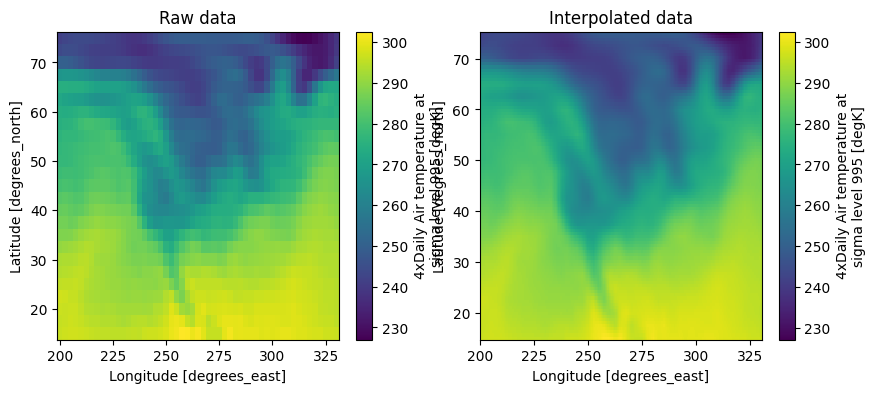

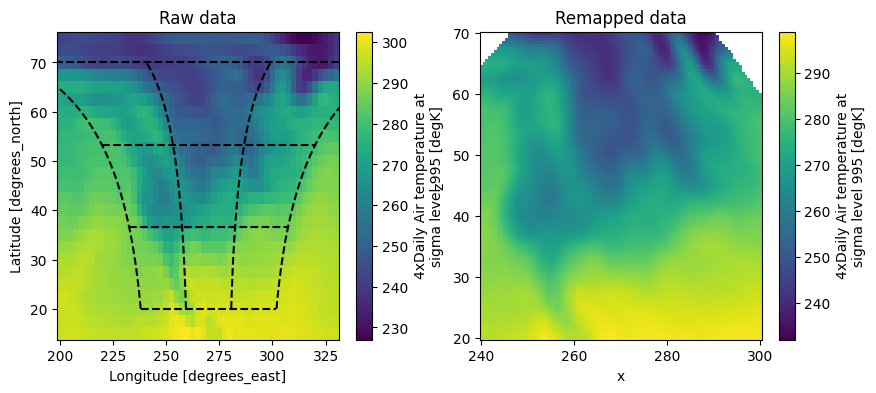

In [8]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.tutorial.open_dataset("air_temperature").isel(time=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0])


axes[0].set_title("Raw data")


# Interpolated data

new_lon = np.linspace(ds.lon[0], ds.lon[-1], ds.dims["lon"] * 4)

new_lat = np.linspace(ds.lat[0], ds.lat[-1], ds.dims["lat"] * 4)

dsi = ds.interp(lat=new_lat, lon=new_lon)

dsi.air.plot(ax=axes[1])

axes[1].set_title("Interpolated data")

x = np.linspace(240, 300, 100)

z = np.linspace(20, 70, 100)

lat = xr.DataArray(z, dims=["z"], coords={"z": z})

lon = xr.DataArray((x[:, np.newaxis] - 270) / np.cos(z * np.pi / 180) + 270,dims=["x", "z"],coords={"x": x, "z": z},

)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0])

for idx in [0, 33, 66, 99]:
    axes[0].plot(lon.isel(x=idx), lat, "--k")
for idx in [0, 33, 66, 99]:
    axes[0].plot(*xr.broadcast(lon.isel(z=idx), lat.isel(z=idx)), "--k")
axes[0].set_title("Raw data")

dsi = ds.interp(lon=lon, lat=lat)

dsi.air.plot(ax=axes[1])

axes[1].set_title("Remapped data")

In [9]:
lat

<xarray.DataArray (z: 100)>
array([20.        , 20.50505051, 21.01010101, 21.51515152, 22.02020202,
       22.52525253, 23.03030303, 23.53535354, 24.04040404, 24.54545455,
       25.05050505, 25.55555556, 26.06060606, 26.56565657, 27.07070707,
       27.57575758, 28.08080808, 28.58585859, 29.09090909, 29.5959596 ,
       30.1010101 , 30.60606061, 31.11111111, 31.61616162, 32.12121212,
       32.62626263, 33.13131313, 33.63636364, 34.14141414, 34.64646465,
       35.15151515, 35.65656566, 36.16161616, 36.66666667, 37.17171717,
       37.67676768, 38.18181818, 38.68686869, 39.19191919, 39.6969697 ,
       40.2020202 , 40.70707071, 41.21212121, 41.71717172, 42.22222222,
       42.72727273, 43.23232323, 43.73737374, 44.24242424, 44.74747475,
       45.25252525, 45.75757576, 46.26262626, 46.76767677, 47.27272727,
       47.77777778, 48.28282828, 48.78787879, 49.29292929, 49.7979798 ,
       50.3030303 , 50.80808081, 51.31313131, 51.81818182, 52.32323232,
       52.82828283, 53.33333333, 53.83838384, 54.34343434, 54.84848485,
       55.35353535, 55.85858586, 56.36363636, 56.86868687, 57.37373737,
       57.87878788, 58.38383838, 58.88888889, 59.39393939, 59.8989899 ,
       60.4040404 , 60.90909091, 61.41414141, 61.91919192, 62.42424242,
       62.92929293, 63.43434343, 63.93939394, 64.44444444, 64.94949495,
       65.45454545, 65.95959596, 66.46464646, 66.96969697, 67.47474747,
       67.97979798, 68.48484848, 68.98989899, 69.49494949, 70.        ])
Coordinates:
  * z        (z) float64 20.0 20.51 21.01 21.52 22.02 ... 68.48 68.99 69.49 70.0

In [12]:
lat.shape

(100,)

1.5 1.5 1.75 2.0 2.25 2.5
1.9


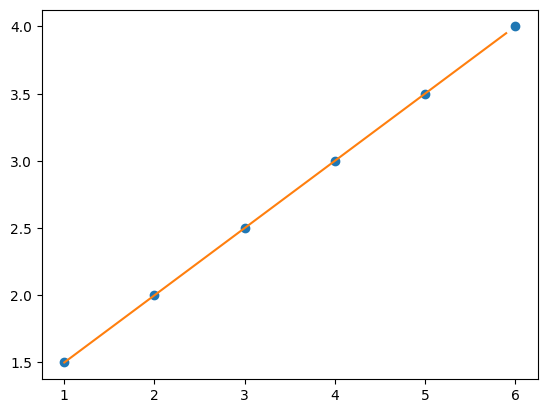

-1.8 -1.8 -1.55 -1.2000000000000002 -0.75 -0.19999999999999996
-1.352


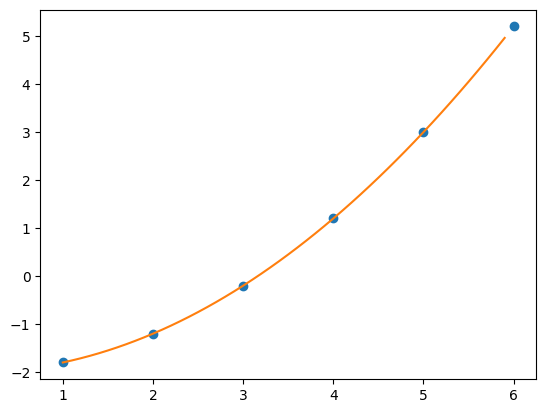

In [15]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

### 1d example of interpolation ###

in_data_x = np.array([1., 2., 3., 4., 5., 6.])
in_data_y = np.array([1.5, 2., 2.5, 3.,  3.5,  4.])  # y = .5 x - 1
f = interp1d(in_data_x, in_data_y, kind='linear')

print(f)
# f in all of the points of the grid (in_data_x): output coincides with in_data_y

    
print(f(1), f(1.), f(1.5), f(2.), f(2.5), f(3.))
# f in a point outside the grid:
print(f(1.8))


# plot up to this point
xnew = np.arange(1, 6, 0.1)
ynew = f(xnew)
plt.plot(in_data_x, in_data_y, 'o', xnew, ynew, '-')
# close the image to move forward.
plt.show()

### another 1d example of interpolation ###

in_data_x = np.array([1., 2., 3., 4., 5., 6.])
in_data_y = np.array([-1.8, -1.2, -0.2, 1.2, 3., 5.2])  # y = .2 x**2 - 2
f = interp1d(in_data_x, in_data_y, kind='cubic')

print(f)
# f in all of the points of the grid (in_data_x): output coincides with in_data_y
print(f(1), f(1.), f(1.5), f(2.), f(2.5), f(3.))
# f in a point outside the grid:
print(f(1.8))


# plot up to this point
xnew = np.arange(1, 6, 0.1)
ynew = f(xnew)
plt.plot(in_data_x, in_data_y, 'o', xnew, ynew, '-')
plt.show()

In [24]:
np.array((np.ones((25,25)).flatten(),np.ones((25,25)).flatten())).T.shape

(625, 2)